In [1]:
# Проверим нашу рабочую директорию
import os

dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /home/tim
Directory name is : tim


In [2]:
# При необходимости, поменяем на новую рабочую директорию.
os.chdir('/home/tim/02_ML')

In [3]:
# Загрузим txt файл с помощью Pandas. В файле всего две колонки без заголовка. Присвоим колонкам имена. 
import pandas as pd
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [4]:
# Посмотрим на первые 6 строк (включая заголовок)
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
# получим сводную информацию по всей таблице 
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


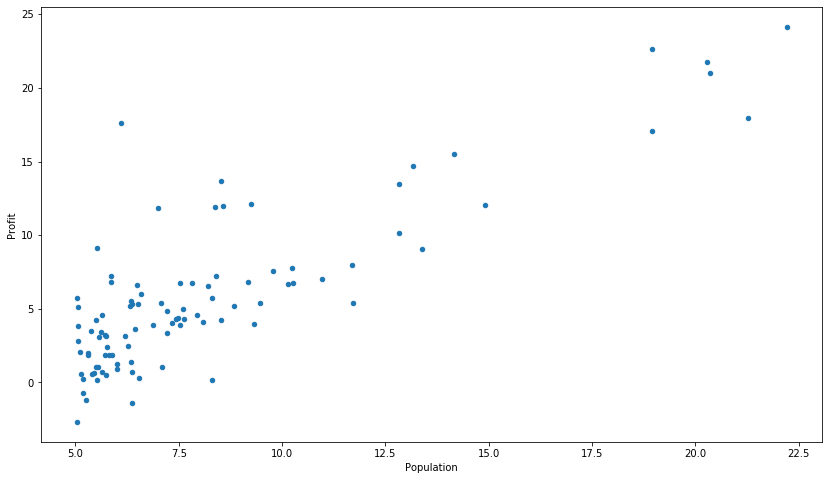

In [7]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(14,8))

# Cost function

In [8]:
# добавим фиктивную размерность x_0 = 1 для каждого наблюдения
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
# пусть Х - датафрейм наблюдений и признаков (включая фиктивную единичную колонку слева);
# пусть y - объясняемая (или целевая) переменная;
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X.head(), y.head()

(   Ones  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598,     Profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233)

In [10]:
# преобразование Х и y (датафреймов) в матрицы;
import numpy as np
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape

((97, 2), (97, 1))

In [11]:
# в задаче первоначальный параметр для theta_0 и theta_1 равен нулю;
theta = np.matrix(np.array([0,0]))
theta, theta.shape

(matrix([[0, 0]]), (1, 2))

In [12]:
# функция потерь (cost function)
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [13]:
# ответ на первое задание
computeCost(X, y, theta)

32.072733877455676